In [1]:
import math

from PIL import Image
from PIL import ImageOps

#import numpy as np
import autograd.numpy as np

def calculate_edges(img, size):
    row_coord, col_coord = np.nonzero(-(np.matrix(img.getdata()).reshape(size)) + 255)
    # Left, Top, Right, Bottom
    return np.min(col_coord) - 1, np.min(row_coord) - 1, np.max(col_coord) + 1, np.max(row_coord) + 1

def calculate_normalizing_dimensions(image, theta):
    rotated_image = ImageOps.crop(ImageOps.expand(image, 750, 255).rotate(theta), 500)
    sides = calculate_edges(rotated_image, (1000, 1000))
    return sides

def generate_sample(image, theta, normalizing_dimensions):
    """Rotates an image, downsample it to a 28x28 sample, and then reatures the 28*28 feature vector.
    
    :param - img
        The image to be transformed and downsampled.
        
    :param - theta
        The angle to transform the image before downsampling.
    """
    rotated_image = ImageOps.crop(ImageOps.expand(image, 750, 255).rotate(theta), 500)
    
    #sides = calculate_edges(rotated_image, (1000, 1000))
    
    # Image is 1000 x 1000
    # normalizing_dimensions is width x height
    #width_difference = 1000 - normalizing_dimensions[0]
    #height_difference = 1000 - normalizing_dimensions[1]
    #expansion = max(width_difference, height_difference) / 2
    #compression = min(width_difference, height_difference)
    #expansion_image = ImageOps.expand(rotated_image, expansion, 255)
    
    #if width_difference < height_difference:
    #    side_left = (height_difference - width_difference) / 2
    #    side_top = 0
    #    side_right = expansion_image.size[0] - ((height_difference - width_difference) / 2)
    #    side_bottom = expansion_image.size[1]
    #else:
    #    side_left = 0
    #    side_top = (width_difference - height_difference) / 2
    #    side_right = expansion_image.size[0]
    #    side_bottom = expansion_image.size[1] - ((width_difference - height_difference) / 2)
    
    #sides = (side_left, side_top, side_right, side_bottom)
    
    #cropped_image = rotated_image.crop(sides)

    cropped_image = rotated_image.crop(normalizing_dimensions)
    
    # Makes it a square
    cropped_max_size = max(cropped_image.size)
    
    cropped_difference_half = int(((1.0 * cropped_max_size) - min(cropped_image.size)) / 2)
    
    expanded_cropped_image = ImageOps.expand(cropped_image, cropped_difference_half, 255)
    
    expanded_cropped_image_size = expanded_cropped_image.size
    
    # Width is greater
    if cropped_image.size[0] > cropped_image.size[1]:
        cropped_expanded_cropped_image = expanded_cropped_image.crop((cropped_difference_half,
                                                                     0,
                                                                     expanded_cropped_image_size[0] - cropped_difference_half,
                                                                     expanded_cropped_image_size[1]))
    # Height is greater
    else:
        cropped_expanded_cropped_image = expanded_cropped_image.crop((0,
                                                                     cropped_difference_half,
                                                                     expanded_cropped_image_size[0],
                                                                     expanded_cropped_image_size[1] - cropped_difference_half))
    
    
    #return cropped_expanded_cropped_image
    return (-np.array(cropped_expanded_cropped_image.resize((28,28)).getdata()) + 255) * 1.0 / 255
    #img_data = np.matrix(list(rotated_img.getdata()))
    
    
    #d = c.reshape((2000, 2000))
    #e = (-d) % 255
    #e = ImageOps.crop(ImageOps.expand(a, 250, 255).rotate(45), 146)
    #math.floor((1000 - 500*math.sqrt(2)) / 2)

    #scaled_img = rotated_img.resize((128,128))
    
    #return scaled_img

example = Image.open('characters/traditional_dragon_15.png')
example2 = Image.open('characters/traditional_dragon_03.png')

z = generate_sample(example2, 90, calculate_normalizing_dimensions(example, 90))
#Image.fromarray((-(z.reshape(28,28) * 255) + 255).astype('uint8'), 'L')
#z.resize((28,28))
#z.shape
#z
#calculate_prescale_dimensions(example, 90)
#y = np.array(z.getdata())
#y.size
#z.size
#Image.fromarray(y.reshape(445,445), 'I')
#Image.frombuffer('I', (445, 445), y, 'raw', 'I', 0, 255)
#Image.fromarray(np.array(z.getdata()).astype('uint8').reshape((445,445)))

def view_feature_array(array, size):
    return Image.fromarray((-(array.reshape(size) * 255) + 255).astype('uint8'), 'L')

#view_feature_array(z, (28, 28))

#view_feature_array(np.array([generate_sample(example, 90, calculate_normalizing_dimensions(example, 90)),
#         generate_sample(example2, 90, calculate_normalizing_dimensions(example, 90))])[1],(28,28))

In [77]:
#view_feature_array(z3[1], (28,28))

name_class_list = [
    ('traditional_dragon_00.png', 0),
    ('traditional_dragon_01.png', 1),
    ('traditional_dragon_02.png', 2),
    ('traditional_dragon_03.png', 3),
    ('traditional_dragon_04.png', 4),
    ('traditional_dragon_05.png', 5),
    ('traditional_dragon_06.png', 6),
    ('traditional_dragon_07.png', 7),
    ('traditional_dragon_08.png', 8),
    ('traditional_dragon_09.png', 9),
    ('traditional_dragon_10.png', 10),
    ('traditional_dragon_11.png', 11),
    ('traditional_dragon_12.png', 12),
    ('traditional_dragon_13.png', 13),
    ('traditional_dragon_14.png', 14),
    ('traditional_dragon_15.png', 15),
    ('simplified_dragon_00.png', 16),
    ('simplified_dragon_01.png', 17),
    ('simplified_dragon_02.png', 18),
    ('simplified_dragon_03.png', 19),
    ('simplified_dragon_04.png', 20)]

In [3]:
image_class_list = map(lambda x: (Image.open('characters/' + x[0]), x[1]), name_class_list)

In [126]:
name_counts_list = [
    ('traditional_dragon', 16),
    ('traditional_beauty', 9),
    ('traditional_love', 13),
    ('simplified_dragon', 5),
    
]

def generate_image_class_pairs(name_counts_pairs):
    global_class_index = 0
    global_image_class_list = []
    
    for pair in name_counts_pairs:
        local_image_class_list = []
        for index in range(pair[1]):
            local_image_class_list.append((Image.open('characters/' + pair[0] + '_' + ('0' + str(index) if index < 10 else str(index)) + '.png'), global_class_index))
            global_class_index += 1
        global_image_class_list.append(local_image_class_list)
    
    return global_image_class_list
    #return map(lambda pair: map(lambda index: (Image.open('characters/' + pair[0] + '_' + ('0' + str(index) if index < 10 else str(index)) + '.png'), pair[1]),
    #                            range(pair[1])),
    #           name_counts_pairs)

def generate_data_sets(image_class_pairs, test_set_size):
    train_set_size = 10 * test_set_size
    sub_image_pairs = image_class_pairs[:-1]
    main_image_pair = image_class_pairs[-1]
    
    mu = 0
    sigma = 0.1
    
    
    # Creating training data
    print 'Generating training data'
    aggregated_generated_image_list = []
    aggregated_generated_class_list = []
    
    for pair_index, pair in enumerate(image_class_pairs):
        print 'Generating images for image', (pair_index + 1), ' out of', len(image_class_pairs)
        
        sampled_rotations = np.random.normal(mu, sigma, train_set_size) * 360
        generated_image_list = []
        generated_class_list = []
        
        for index, theta in enumerate(sampled_rotations):
            normalizing_size = calculate_normalizing_dimensions(main_image_pair[0], theta)
            sample = generate_sample(pair[0],
                                     theta,
                                     normalizing_size)
            generated_image_list.append(sample)
            generated_class_list.append(pair[1])
            if 0 == (index + 1) % 10:
                print 'Generated', (index + 1), 'samples out of', train_set_size, '.'
    
        combined_generated_image_array = np.vstack(generated_image_list)
        aggregated_generated_image_list.append(combined_generated_image_array)
        
        combined_generated_class_array = np.array(generated_class_list)
        aggregated_generated_class_list.append(combined_generated_class_array)
        
    aggregated_generated_image_array = np.vstack(aggregated_generated_image_list)
    aggregated_generated_class_array = np.hstack(aggregated_generated_class_list)
    
    train_x = aggregated_generated_image_array
    train_y = aggregated_generated_class_array
    
    
    # Creating testing data
    print 'Generating testing data'
    aggregated_generated_image_list = []
    aggregated_generated_class_list = []
    
    for pair_index, pair in enumerate(image_class_pairs):
        print 'Generating images for image', (pair_index + 1), ' out of', len(image_class_pairs)
        
        sampled_rotations = np.random.normal(mu, sigma, test_set_size) * 360
        generated_image_list = []
        generated_class_list = []
        
        for index, theta in enumerate(sampled_rotations):
            normalizing_size = calculate_normalizing_dimensions(main_image_pair[0], theta)
            sample = generate_sample(pair[0],
                                     theta,
                                     normalizing_size)
            generated_image_list.append(sample)
            generated_class_list.append(pair[1])
            if 0 == (index + 1) % 10:
                print 'Generated', (index + 1), 'samples out of', train_set_size, '.'
    
        combined_generated_image_array = np.vstack(generated_image_list)
        aggregated_generated_image_list.append(combined_generated_image_array)
        
        combined_generated_class_array = np.array(generated_class_list)
        aggregated_generated_class_list.append(combined_generated_class_array)
        
    aggregated_generated_image_array = np.vstack(aggregated_generated_image_list)
    aggregated_generated_class_array = np.hstack(aggregated_generated_class_list)
    
    test_x = aggregated_generated_image_array
    test_y = aggregated_generated_class_array
    
    return train_x, train_y, test_x, test_y

#tr_x, tr_y, te_x, te_y = generate_data_sets(image_class_list, 1)

all_image_class_pairs_list = generate_image_class_pairs(name_counts_list)
image_class_data_sets = map(lambda image_class_entry: generate_data_sets(image_class_entry, 10), all_image_class_pairs_list)

tr_all_x = np.vstack(map(lambda quad_tuple: quad_tuple[0], image_class_data_sets))
tr_all_y = np.hstack(map(lambda quad_tuple: quad_tuple[1], image_class_data_sets))
te_all_x = np.vstack(map(lambda quad_tuple: quad_tuple[2], image_class_data_sets))
te_all_y = np.hstack(map(lambda quad_tuple: quad_tuple[3], image_class_data_sets))

Generating training data
Generating images for image 1  out of 16
Generated 10 samples out of 100 .
Generated 20 samples out of 100 .
Generated 30 samples out of 100 .
Generated 40 samples out of 100 .
Generated 50 samples out of 100 .
Generated 60 samples out of 100 .
Generated 70 samples out of 100 .
Generated 80 samples out of 100 .
Generated 90 samples out of 100 .
Generated 100 samples out of 100 .
Generating images for image 2  out of 16
Generated 10 samples out of 100 .
Generated 20 samples out of 100 .
Generated 30 samples out of 100 .
Generated 40 samples out of 100 .
Generated 50 samples out of 100 .
Generated 60 samples out of 100 .
Generated 70 samples out of 100 .
Generated 80 samples out of 100 .
Generated 90 samples out of 100 .
Generated 100 samples out of 100 .
Generating images for image 3  out of 16
Generated 10 samples out of 100 .
Generated 20 samples out of 100 .
Generated 30 samples out of 100 .
Generated 40 samples out of 100 .
Generated 50 samples out of 100 .


ValueError: total size of new array must be unchanged

In [127]:
tr_all_y.shape

(210,)

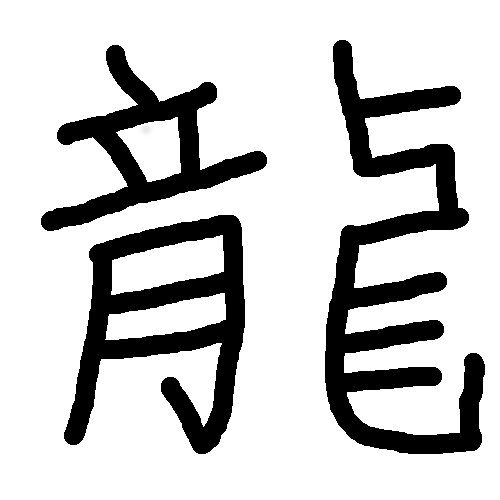

In [105]:
all_image_class_pairs_list[0][15][0]

In [8]:
tr_x.shape

(160, 784)

In [7]:
from autograd import grad
#import autograd.numpy as np

In [ ]:
# DO NOT RUN THIS! HERE FOR EXAMPLE ONLY!

import cPickle, gzip, numpy

# Load the dataset
f = gzip.open('mnist.pkl.gz', 'rb')
train_set, valid_set, test_set = cPickle.load(f)
f.close()

def shared_dataset(data_xy):
    """ Function that loads the dataset into shared variables

    The reason we store our dataset in shared variables is to allow
    Theano to copy it into the GPU memory (when code is run on GPU).
    Since copying data into the GPU is slow, copying a minibatch everytime
    is needed (the default behaviour if the data is not in a shared
    variable) would lead to a large decrease in performance.
    """
    data_x, data_y = data_xy
    #shared_x = theano.shared(numpy.asarray(data_x, dtype=theano.config.floatX))
    #shared_y = theano.shared(numpy.asarray(data_y, dtype=theano.config.floatX))
    # When storing data on the GPU it has to be stored as floats
    # therefore we will store the labels as ``floatX`` as well
    # (``shared_y`` does exactly that). But during our computations
    # we need them as ints (we use labels as index, and if they are
    # floats it doesn't make sense) therefore instead of returning
    # ``shared_y`` we will have to cast it to int. This little hack
    # lets us get around this issue
    #return shared_x, T.cast(shared_y, 'int32')
    return data_x, data_y

test_set_x, test_set_y = shared_dataset(test_set)
valid_set_x, valid_set_y = shared_dataset(valid_set)
train_set_x, train_set_y = shared_dataset(train_set)

batch_size = 500    # size of the minibatch

# accessing the third minibatch of the training set

data  = train_set_x[2 * batch_size: 3 * batch_size]
label = train_set_y[2 * batch_size: 3 * batch_size]

In [117]:
# Logistic Regression

def linear_activation(W, b, X):
    """
    :param - W - m input nodes (one for each feature) with c output nodes (one for each class)
    :param - b - c bias weight nodes (one for each class)
    :param - X - n samples with m features each, nxm matrix
    """
    return np.dot(X, W) + b

# P(Y = i | x, W, b)
# p_y_given_x
def softmax(W, b, X):
    """
    :param - W - m input nodes (one for each feature) with c output nodes (one for each class)
    :param - b - c bias weight nodes (one for each class)
    :param - X - n samples with m features each, nxm matrix
    """
    return np.exp(np.dot(X, W) + b) / np.sum(np.exp(np.dot(X, W) + b), axis=1)[:, None]

# y_pred
def prediction(W, b, X):
    """
    :param - W - m input nodes (one for each feature) with c output nodes (one for each class)
    :param - b - c bias weight nodes (one for each class)
    :param - X - n samples with m features each, nxm matrix
    """
    return np.argmax(softmax(W, b, X), axis=1)

def likelihood(W, b, X, Y):
    """
    :param - W - m input nodes (one for each feature) with c output nodes (one for each class)
    :param - b - c bias weight nodes (one for each class)
    :param - X - n samples with m features each, nxm matrix
    :param - Y - n classifications (one for each sample)
    """
    return softmax(W, b, X)[np.arange(Y.shape[0]), Y]

def negative_log_likelihood(W, b, X, Y):
    """
    :param - W - m input nodes (one for each feature) with c output nodes (one for each class)
    :param - b - c bias weight nodes (one for each class)
    :param - X - n samples with m features each, nxm matrix
    :param - Y - n classifications (one for each sample)
    """    
    return -likelihood(W, b, X, Y)

def loss(W, b, X, Y):
    """
    :param - W - m input nodes (one for each feature) with c output nodes (one for each class)
    :param - b - c bias weight nodes (one for each class)
    :param - X - n samples with m features each, nxm matrix
    :param - Y - n classifications (one for each sample)
    """
    return np.mean(negative_log_likelihood(W, b, X, Y))

def errors(W, b, X, Y):
    """
    :param - W - m input nodes (one for each feature) with c output nodes (one for each class)
    :param - b - c bias weight nodes (one for each class)
    :param - X - n samples with m features each, nxm matrix
    :param - Y - n classifications (one for each sample)
    """
    return np.mean(np.not_equal(prediction(W, b, X), Y))

loss_grad_W = grad(loss, 0)
loss_grad_b = grad(loss, 1)

class LogisticRegression():
    def __init__(self, n_in, n_out, learning_rate=0.13):
        self.W = np.random.rand(n_in * n_out).reshape(n_in, n_out)
        self.b = np.zeros((n_out,), dtype=np.float64)
        self.learning_rate = learning_rate

def logistic_regression_update_values(lr, X, Y):
    W_update = lr.W - lr.learning_rate * loss_grad_W(lr.W, lr.b, X, Y)
    b_update = lr.b - lr.learning_rate * loss_grad_b(lr.W, lr.b, X, Y)
    
    return W_update, b_update
        
    
def logistic_regression_training_environment(lr, data, labels, epochs=100, batch_size=500):
    n_train_batches = data.shape[0] // batch_size
    
    for epoch_count in range(epochs):
        for index in range(n_train_batches):
            X_batch = data[index * batch_size: (index + 1) * batch_size]
            Y_batch = labels[index * batch_size: (index + 1) * batch_size]
            
            lr.W, lr.b = logistic_regression_update_values(lr, X_batch, Y_batch)
            
        if 0 == epoch_count % 100:
            print 'Epoch:', epoch_count, ', Error rate:', errors(lr.W, lr.b, data, labels)
            
def logistic_regression_demo():
    from autograd import grad
    import autograd.numpy as np
    import cPickle, gzip, numpy

    # Load the dataset
    demo_f = gzip.open('mnist.pkl.gz', 'rb')
    demo_train_set, demo_valid_set, demo_test_set = cPickle.load(demo_f)
    demo_f.close()

    demo_test_set_x, demo_test_set_y = demo_test_set
    demo_valid_set_x, demo_valid_set_y = demo_valid_set
    demo_train_set_x, demo_train_set_y = demo_train_set

    demo_n_in = 28*28
    demo_n_out = 10
    demo_learning_rate = 0.13
    
    demo_c = LogisticRegression(demo_n_in, demo_n_out, demo_learning_rate)
    
    print "Baseline:", errors(c.W, c.b, demo_test_set_x, demo_test_set_y)
    
    logistic_regression_training_environment(demo_c, demo_train_set_x, demo_train_set_y, 1000)
    
    print "End of Training:", errors(c.W, c.b, demo_test_set_x, demo_test_set_y)

In [118]:
chr_in = 28*28
#chr_out = len(image_class_list)
chr_out = np.max(tr_all_y) + 1
chr_learning_rate = 0.13

c = LogisticRegression(chr_in, chr_out, chr_learning_rate)

In [119]:
print 'Baseline Error Rate:', errors(c.W, c.b, te_all_x, te_all_y)

Baseline Error Rate: 0.952380952381


In [120]:
logistic_regression_training_environment(c, tr_all_x, tr_all_y, epochs=10000, batch_size=30)

Epoch: 0 , Error rate: 0.914285714286
Epoch: 100 , Error rate: 0.666666666667
Epoch: 200 , Error rate: 0.571428571429
Epoch: 300 , Error rate: 0.542857142857
Epoch: 400 , Error rate: 0.52380952381
Epoch: 500 , Error rate: 0.5
Epoch: 600 , Error rate: 0.466666666667
Epoch: 700 , Error rate: 0.428571428571
Epoch: 800 , Error rate: 0.404761904762
Epoch: 900 , Error rate: 0.390476190476
Epoch: 1000 , Error rate: 0.385714285714
Epoch: 1100 , Error rate: 0.380952380952
Epoch: 1200 , Error rate: 0.37619047619
Epoch: 1300 , Error rate: 0.366666666667
Epoch: 1400 , Error rate: 0.366666666667
Epoch: 1500 , Error rate: 0.366666666667
Epoch: 1600 , Error rate: 0.352380952381
Epoch: 1700 , Error rate: 0.352380952381
Epoch: 1800 , Error rate: 0.352380952381
Epoch: 1900 , Error rate: 0.347619047619
Epoch: 2000 , Error rate: 0.347619047619
Epoch: 2100 , Error rate: 0.347619047619
Epoch: 2200 , Error rate: 0.342857142857
Epoch: 2300 , Error rate: 0.333333333333
Epoch: 2400 , Error rate: 0.328571428571


In [121]:
import cPickle
save_file = open('pickledModel', 'wb')  # this will overwrite current contents
#cPickle.dump(w.get_value(borrow=True), save_file, -1)  # the -1 is for HIGHEST_PROTOCOL
#cPickle.dump(v.get_value(borrow=True), save_file, -1)  # .. and it triggers much more efficient
#cPickle.dump(u.get_value(borrow=True), save_file, -1)  # .. storage than numpy's default
cPickle.dump(c.W, save_file, -1)
cPickle.dump(c.b, save_file, -1)
save_file.close()

In [122]:
save_file = open('pickledModel')
#w.set_value(cPickle.load(save_file), borrow=True)
#v.set_value(cPickle.load(save_file), borrow=True)
#u.set_value(cPickle.load(save_file), borrow=True)

pullW = cPickle.load(save_file)
pullB = cPickle.load(save_file)

save_file.close()

In [28]:
np.sum(~np.equal(c.W, pullW))

0

In [30]:
np.sum(~np.equal(c.b, pullB))

0

In [31]:
c.W.shape

(784, 16)

In [34]:
reshapedW = c.W.reshape(784 * 16)

In [36]:
sum(~np.equal(c.W, reshapedW.reshape(784, 16)))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [124]:
import json
import collections

export_weights_json = {
    "W_rows": c.W.shape[0],
    "W_columns": c.W.shape[1],
    "b_entries": c.b.shape[0],
    "W": list(c.W.reshape(784 * (np.max(tr_all_y) + 1))),
    "b": list(c.b),
    "class_map": {y: x for x, y in name_class_list},
    "count_map": {x: y for x, y in collections.Counter(map(lambda pair: '_'.join(pair[0].rsplit('_')[:-1]), name_class_list)).iteritems()}
}

save_file = open('weights.json', 'wb')
json.dump(export_weights_json, save_file)
save_file.close()

In [47]:
{y: x for x, y in name_class_list}

{0: 'traditional_dragon_00.png',
 1: 'traditional_dragon_01.png',
 2: 'traditional_dragon_02.png',
 3: 'traditional_dragon_03.png',
 4: 'traditional_dragon_04.png',
 5: 'traditional_dragon_05.png',
 6: 'traditional_dragon_06.png',
 7: 'traditional_dragon_07.png',
 8: 'traditional_dragon_08.png',
 9: 'traditional_dragon_09.png',
 10: 'traditional_dragon_10.png',
 11: 'traditional_dragon_11.png',
 12: 'traditional_dragon_12.png',
 13: 'traditional_dragon_13.png',
 14: 'traditional_dragon_14.png',
 15: 'traditional_dragon_15.png'}

In [50]:
v = 'as_fda_FDA'

In [66]:
import collections

v = collections.Counter(map(lambda pair: '_'.join(pair[0].rsplit('_')[:-1]), name_class_list))

In [74]:
{x:y for x,y in v.iteritems()}

{'traditional_dragon': 16}